# LETID - Outdoor Geospatioal Demo

![PVDeg Logo](../PVD_logo.png)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pvdeg
from pvdeg import DATA_DIR
import dask.array as da
import dask.dataframe as dd
import xarray as xr
import os

In [2]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("pvdeg version ", pvdeg.__version__)

Working on a  Windows 10
Python version  3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0
pvdeg version  0.2.0+12.g277eda3.dirty


## Single location example

In [2]:
weather_file = os.path.join(DATA_DIR,'psm3_demo.csv')
WEATHER, META = pvdeg.weather.read(weather_file,'psm')

In [3]:
kwargs = {'tau_0': 115, # us, carrier lifetime in non-degraded states, e.g. LETID/LID states A or C
        'tau_deg': 55, # us, carrier lifetime in fully-degraded state, e.g. LETID/LID state B
        'wafer_thickness': 180, # um
        's_rear': 46, # cm/s
        'cell_area': 243, # cm^2
        'na_0': 100,
        'nb_0': 0,
        'nc_0': 0,
        'mechanism_params': 'repins'
    }

In [4]:
pvdeg.letid.calc_letid_outdoors(weather_df=WEATHER, meta=META, **kwargs)

,Temperature,Injection,NA,NB,NC,tau,Jsc,Voc,Isc,FF,Pmp,Pmp_norm
time,,,,,,,,,,,,
1999-01-01 00:30:00-07:00,0.0,NaN,100.000000,0.000000e+00,0.000000e+00,115.000000,41.590997,0.666327,10.106612,0.840987,5.663467,1.000000
1999-01-01 01:30:00-07:00,0.0,NaN,100.000000,1.702422e-15,0.000000e+00,115.000000,41.590997,0.666327,10.106612,0.840987,5.663467,1.000000
1999-01-01 02:30:00-07:00,0.0,NaN,100.000000,3.404843e-15,5.403329e-36,115.000000,41.590997,0.666327,10.106612,0.840987,5.663467,1.000000
1999-01-01 03:30:00-07:00,0.0,NaN,100.000000,5.107265e-15,1.620999e-35,115.000000,41.590997,0.666327,10.106612,0.840987,5.663467,1.000000
1999-01-01 04:30:00-07:00,0.0,NaN,100.000000,6.809686e-15,3.241997e-35,115.000000,41.590997,0.666327,10.106612,0.840987,5.663467,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-31 19:30:00-07:00,0.0,NaN,27.833654,6.778463e+01,4.381716e+00,66.112142,41.333851,0.654974,10.044126,0.838966,5.519257,0.974537
1999-12-31 20:30:00-07:00,0.0,NaN,27.833654,6.778463e+01,4.381716e+00,66.112142,41.333851,0.654974,10.044126,0.838966,5.519257,0.974537
1999-12-31 21:30:00-07:00,0.0,NaN,27.833654,6.778463e+01,4.381716e+00,66.112142,41.333851,0.654974,10.044126,0.838966,5.519257,0.974537


### Start distributed compute cluster - DASK

In [5]:
local = {'manager': 'local',
         'n_workers': 1,
         'threads_per_worker': 8, # Number of CPUs
         }

kestrel = {
    'manager': 'slurm',
    'n_jobs': 1,  # Number of nodes used for parallel processing
    'cores': 104,
    'memory': '256GB',
    'account': 'pvsoiling',
    'queue': 'debug',
    'walltime': '1:00:00',
    'processes': 104,
    'job_extra_directives': ['-o ./logs/slurm-%j.out'],
    }

pvdeg.geospatial.start_dask(hpc=kestrel)

Dashboard: http://10.60.1.202:8787/status


<Client: 'tcp://10.60.1.202:45409' processes=0 threads=0, memory=0 B>

In [6]:
# Get weather data
weather_db = 'NSRDB'

weather_arg = {'satellite': 'Americas',
               'names': 2022,
               'NREL_HPC': True,
               'attributes': ['air_temperature', 'wind_speed', 'dhi', 'ghi', 'dni', 'relative_humidity']}

weather_ds, meta_df = pvdeg.weather.get(weather_db, geospatial=True, **weather_arg)

# Define geographical region
meta_SW = meta_df[meta_df['state'].isin(['Colorado', 'New Mexico', 'Utah', 'Arizona'])]
meta_SW_sub, gids_SW_sub = pvdeg.utilities.gid_downsampling(meta_SW, 6)

weather_SW_sub = weather_ds.sel(gid=meta_SW_sub.index)

/home/mspringe/.conda-envs/pvdeg_311/lib/python3.11/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "phony_dim_1" starting at index 500. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


In [7]:
weather_SW_sub

<xarray.Dataset> Size: 409MB
Dimensions:            (time: 17520, gid: 486)
Coordinates:
  * gid                (gid) int64 4kB 277461 277473 277485 ... 554496 554508
  * time               (time) datetime64[ns] 140kB 2022-01-01 ... 2022-12-31T...
Data variables:
    temp_air           (time, gid) float64 68MB dask.array<chunksize=(2000, 3), meta=np.ndarray>
    wind_speed         (time, gid) float64 68MB dask.array<chunksize=(2000, 3), meta=np.ndarray>
    dhi                (time, gid) float64 68MB dask.array<chunksize=(2000, 3), meta=np.ndarray>
    ghi                (time, gid) float64 68MB dask.array<chunksize=(2000, 3), meta=np.ndarray>
    dni                (time, gid) float64 68MB dask.array<chunksize=(2000, 3), meta=np.ndarray>
    relative_humidity  (time, gid) float64 68MB dask.array<chunksize=(2000, 3), meta=np.ndarray>
Attributes:
    full_version_record:  {"rex": "0.2.80", "pandas": "2.0.0", "numpy": "1.23...
    package:              rex
    version:              4.0.0

In [8]:
meta_df

,latitude,longitude,altitude,tz,country,state,county,wind_height
0,-15.950000,-179.979996,0,12,NaN,NaN,NaN,2
1,-15.990000,-179.979996,0,12,NaN,NaN,NaN,2
2,-16.030001,-179.979996,0,12,NaN,NaN,NaN,2
3,-16.070000,-179.979996,0,12,NaN,NaN,NaN,2
4,-16.110001,-179.979996,0,12,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...
2018262,16.010000,-22.500000,0,-1,NaN,NaN,NaN,2
2018263,15.970000,-22.500000,0,-1,NaN,NaN,NaN,2
2018264,15.930000,-22.500000,0,-1,NaN,NaN,NaN,2
2018265,15.890000,-22.500000,0,-1,NaN,NaN,NaN,2


In [9]:
# Define desired analysis
geo = {'func': pvdeg.letid.calc_letid_outdoors,
       'weather_ds': weather_SW_sub,
       'meta_df': meta_SW_sub,
       'tau_0': 115, # us, carrier lifetime in non-degraded states, e.g. LETID/LID states A or C
       'tau_deg': 55, # us, carrier lifetime in fully-degraded state, e.g. LETID/LID state B
       'wafer_thickness': 180, # um
       's_rear': 46, # cm/s
       'cell_area': 243, # cm^2
       'na_0': 100,
       'nb_0': 0,
       'nc_0': 0,
       'mechanism_params': 'repins'
}

letid_res = pvdeg.geospatial.analysis(**geo)

/kfs2/projects/pvsoiling/pvdeg/repos/PVDegradationTools/pvdeg/geospatial.py:216: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  dims_size = dict(ds_gids.dims) | add_dims
/kfs2/projects/pvsoiling/pvdeg/repos/PVDegradationTools/pvdeg/geospatial.py:182: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'gid' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or 

In [10]:
letid_res

<xarray.Dataset> Size: 962MB
Dimensions:      (latitude: 22, longitude: 26, time: 17520)
Coordinates:
  * latitude     (latitude) float32 88B 31.81 32.29 32.77 ... 40.93 41.41 41.89
  * longitude    (longitude) float32 104B -114.3 -113.8 -113.3 ... -102.8 -102.3
  * time         (time) datetime64[ns] 140kB 2022-01-01 ... 2022-12-31T23:30:00
Data variables:
    FF           (time, latitude, longitude) float64 80MB nan nan ... nan nan
    Temperature  (time, latitude, longitude) float64 80MB nan nan ... nan nan
    NA           (time, latitude, longitude) float64 80MB nan nan ... nan nan
    tau          (time, latitude, longitude) float64 80MB nan nan ... nan nan
    NC           (time, latitude, longitude) float64 80MB nan nan ... nan nan
    Pmp_norm     (time, latitude, longitude) float64 80MB nan nan ... nan nan
    Injection    (time, latitude, longitude) float64 80MB nan nan ... nan nan
    NB           (time, latitude, longitude) float64 80MB nan nan ... nan nan
    Jsc          (time, latitude, longitude) float64 80MB nan nan ... nan nan
    Isc          (time, latitude, longitude) float64 80MB nan nan ... nan nan
    Voc          (time, latitude, longitude) float64 80MB nan nan ... nan nan
    Pmp          (time, latitude, longitude) float64 80MB nan nan ... nan nan

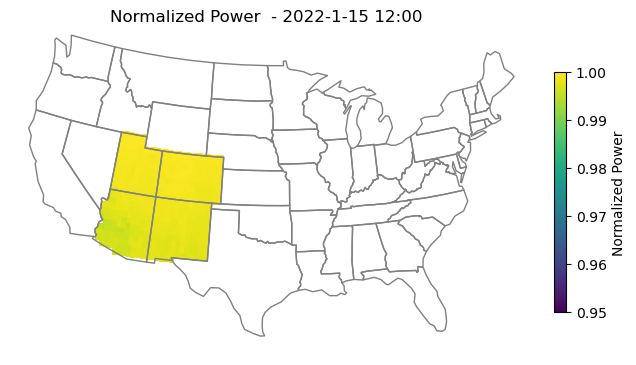

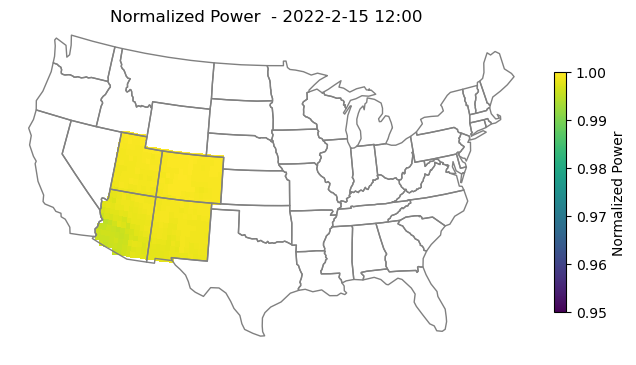

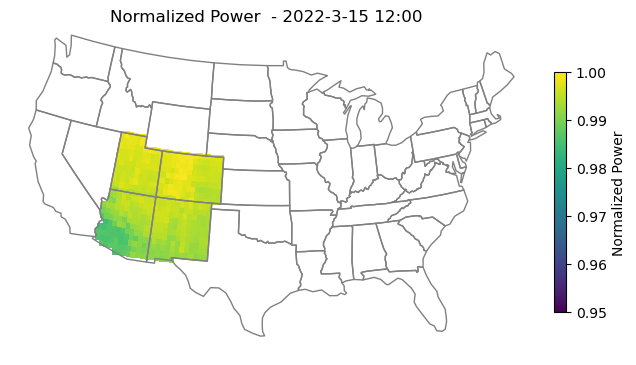

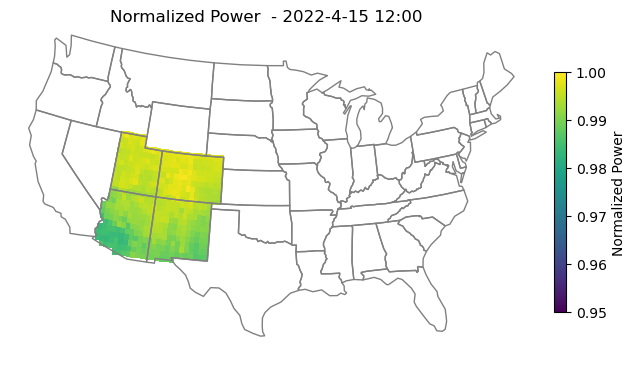

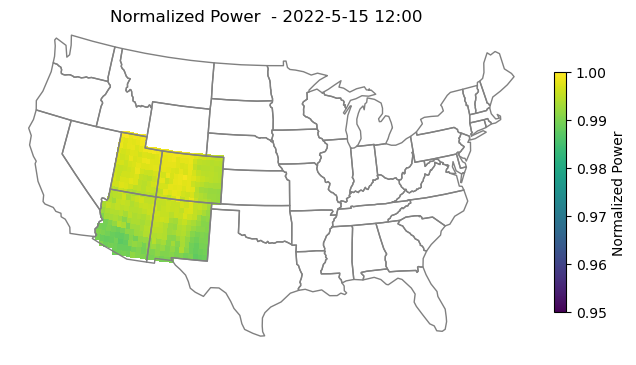

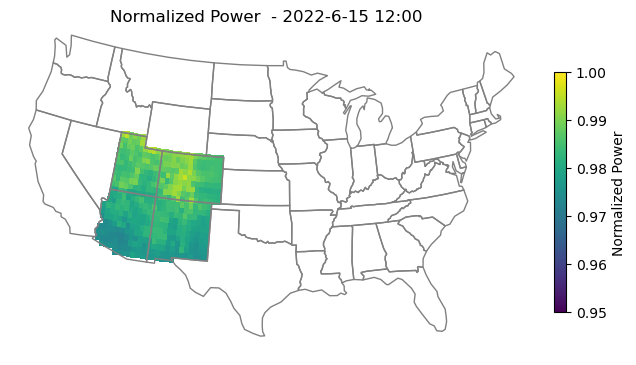

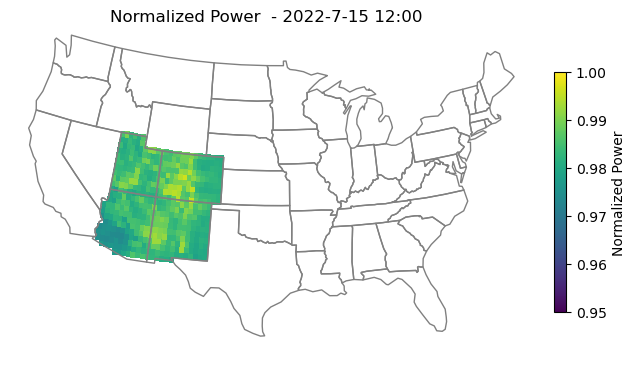

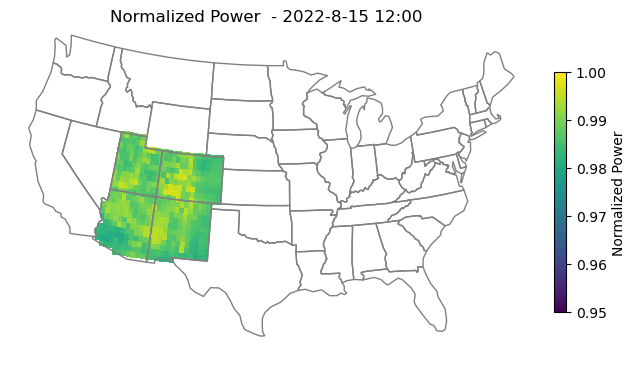

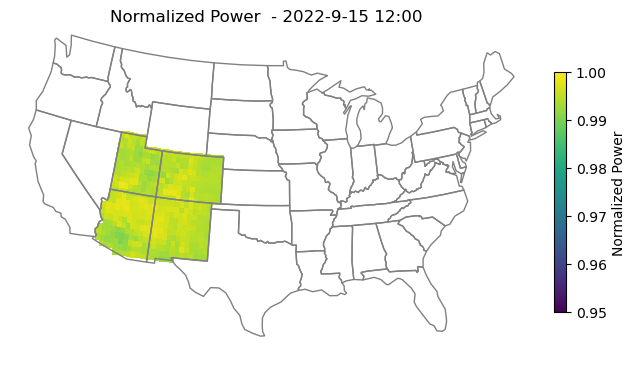

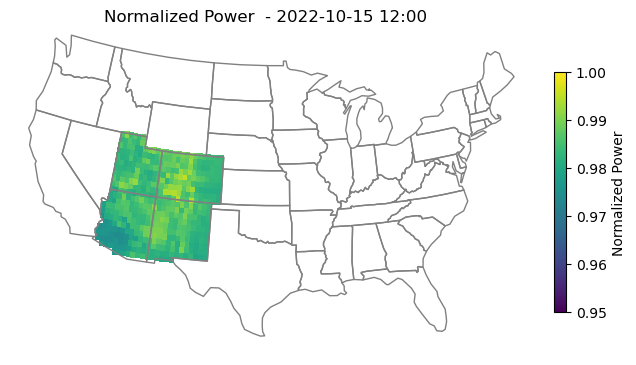

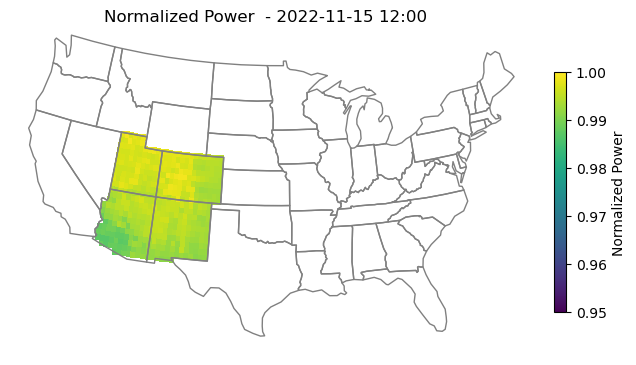

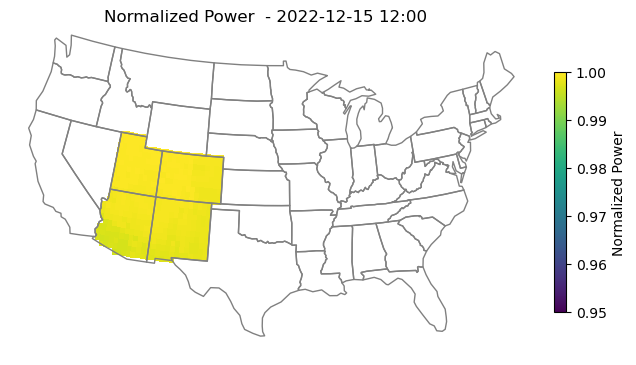

In [11]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation
import datetime
ims = []
for n in range(1, 13):
     for i, np_t in enumerate(letid_res.time):
         t = pd.Timestamp(np_t.values).time()
         d = pd.Timestamp(np_t.values).day
         m = pd.Timestamp(np_t.values).month
         if m == n:
             if d == 15:
                 if t == datetime.time(12):
                     fig, ax = pvdeg.geospatial.plot_USA(letid_res['Pmp_norm'].sel(time=np_t),
                             cmap='viridis', vmin=0.95, vmax=1,
                             title=f'Normalized Power  - 2022-{m}-{d} 12:00',
                             cb_title='Normalized Power')
                     #plt.savefig(f'./images/RH_animation_{n}.png', dpi=600)

#import imageio
#ims = [imageio.imread(f'./images/RH_animation_{n}.png') for n in range(1, 13)]
# imageio.mimwrite(f'./images/RH_animation.gif', ims, format='GIF', duration=1000, loop=10)

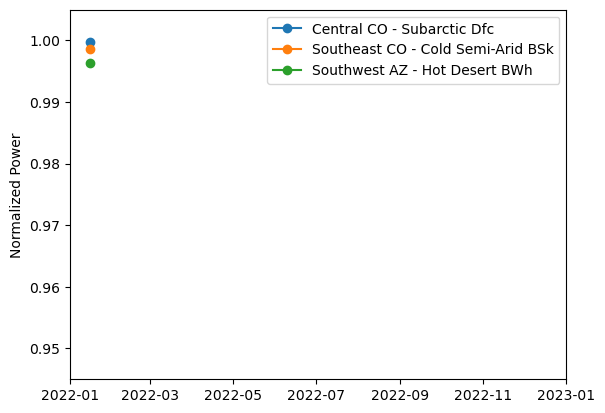

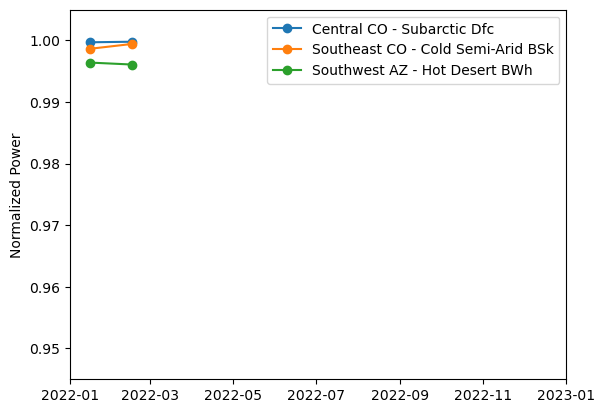

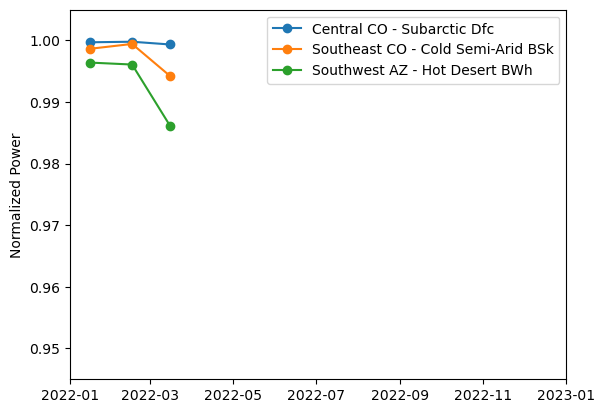

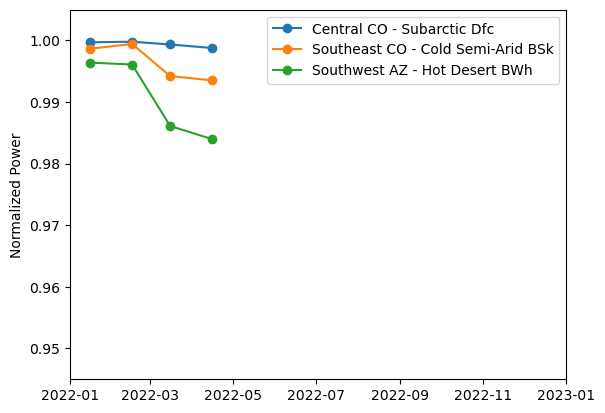

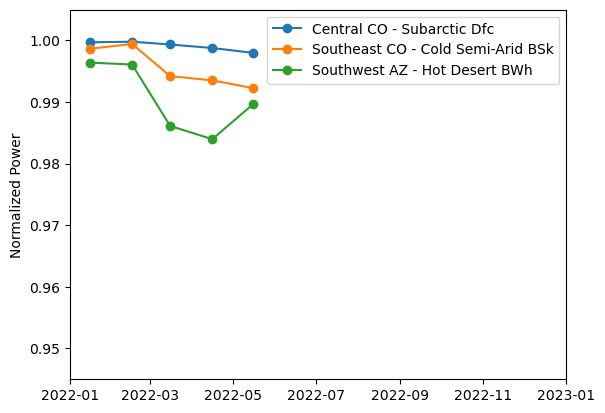

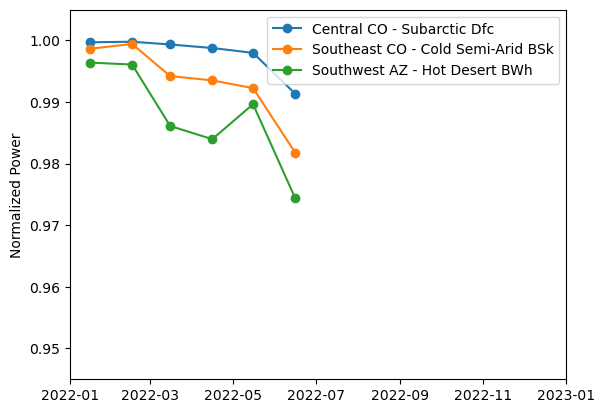

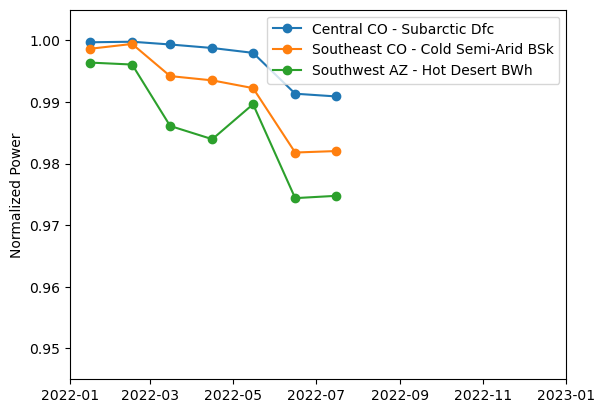

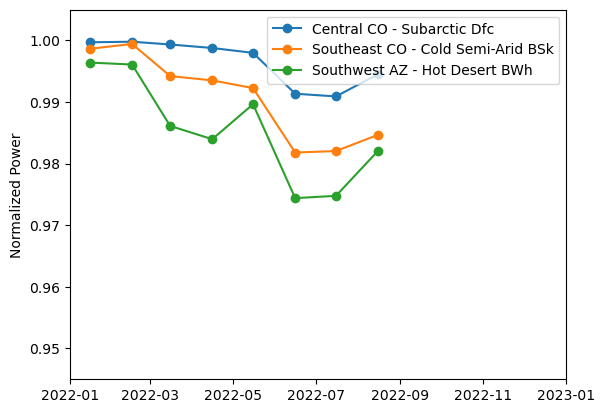

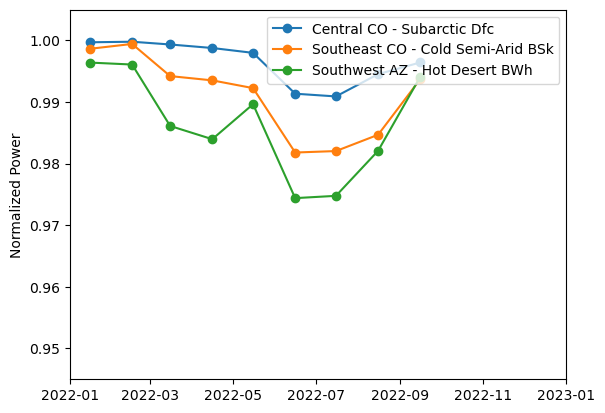

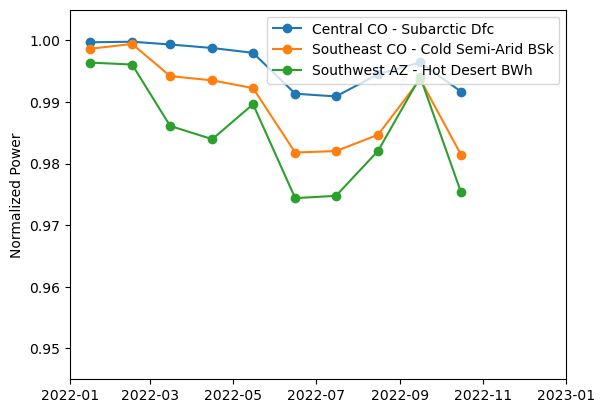

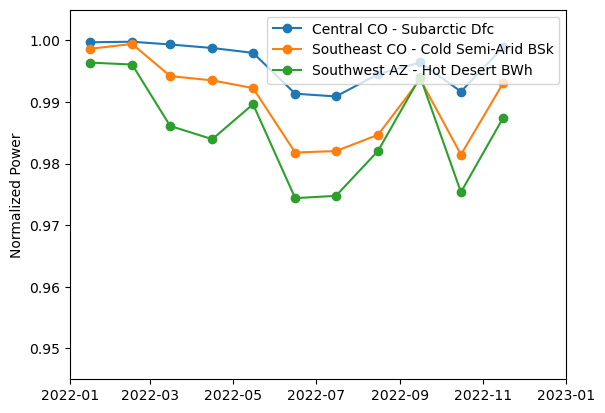

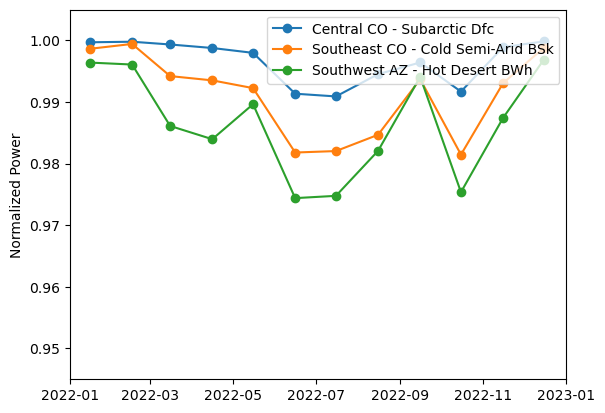

In [13]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation
import datetime

ims = []
dates = []
subarctics = []
coldsemiarids = []
hotdeserts = []

for n in range(1, 13):
     for i, np_t in enumerate(letid_res.time):
         t = pd.Timestamp(np_t.values).time()
         d = pd.Timestamp(np_t.values).day
         m = pd.Timestamp(np_t.values).month
         if m == n:
             if d == 15:
                 if t == datetime.time(12):

                     dates.append(np_t.values)

                     #subartic: near Crested Butte CO
                     #cold semi-arid: near Springfield CO
                     #hot desert: near Yuma AZ

                     subarctic = letid_res.sel(time = np_t, latitude= 39.01, longitude = -107.1)
                     subarctics.append(subarctic['Pmp_norm'])

                     coldsemiarid = letid_res.sel(time = np_t, latitude= 37.57, longitude = -102.3)
                     coldsemiarids.append(coldsemiarid['Pmp_norm'])

                     hotdesert = letid_res.sel(time = np_t, latitude= 32.77, longitude = -114.3)
                     hotdeserts.append(hotdesert['Pmp_norm'])

                     fig, ax = plt.subplots()
                     ax.plot(dates, subarctics, marker = 'o', c = 'C0', label = 'Central CO - Subarctic Dfc')
                     ax.plot(dates, coldsemiarids, marker = 'o', c = 'C1', label = 'Southeast CO - Cold Semi-Arid BSk')
                     ax.plot(dates, hotdeserts, marker = 'o', c = 'C2', label = 'Southwest AZ - Hot Desert BWh')

                     ax.legend(loc = 'upper right')

                     ax.set_xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])

                     ax.set_ylim([0.945, 1.005])
                     ax.set_ylabel('Normalized Power')

                     plt.savefig(f'./images/LETID_plot_animation_{n}.png', dpi=600)


In [ ]:
import imageio
ims = [imageio.imread(f'./images/LETID_plot_animation_{n}.png') for n in range(1, 13)]
imageio.mimwrite(f'./images/LETID_plot_animation.gif', ims, format='GIF', duration=1000, loop=10)